In [75]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

env: KERAS_BACKEND=tensorflow


len :  60000
shape :  (60000, 28, 28)
Raw :  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 240 253 165   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 241 252 252   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 141 252 252 252  98   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  30 252 252 252 252 149   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  

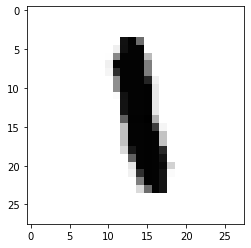

In [81]:
#print raw dataset

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('len : ',len(x_train))
print('shape : ',x_train.shape)
print('Raw : ',x_train[9487])
plt.imshow(x_train[9487],cmap='Greys')

#convert dimension from 28*28 to 1*768
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)
print('dimension after reshape : ',x_train.shape)

In [82]:
'''
transfrom to 1-hot encoding
- 1 -> [0,1,0,0,0,0,0]
- 5 -> [0,0,0,0,0,1,0]
'''

from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('origion : ',y_train[9487])
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print('tranform to 1-hot encoding : ',y_train[9487])

origion :  1
tranform to 1-hot encoding :  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# train my model

# 標準型的NN
from keras.models import Sequential

# fully connected NN - Dense
from keras.layers import Dense, Activation

# method to learn, 隨機梯度下降(Stochastic gradient descent)
from keras.optimizers import SGD

#import training data and change format
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28*28)
y_train = np_utils.to_categorical(y_train,10)
x_test = x_test.reshape(10000,28*28)
y_test = np_utils.to_categorical(y_test,10)

model = Sequential()

# add first hideden layer

nodecount = 500
model.add(Dense(nodecount,input_dim=784))
model.add(Activation('sigmoid'))

# add second hidden layer, 此層不用input_dim因為已知從上一層輸出來的

model.add(Dense(nodecount))
model.add(Activation('sigmoid'))

# output 1-hot encoding

model.add(Dense(10))
# let total count equal 1 : use softmax method
model.add(Activation('softmax'))


SGD_learningRate = 0.1
model.compile(loss='mse',
              optimizer=SGD(lr=SGD_learningRate),
             metrics=['accuracy'])  #目前正確率

model.summary()
'''
output Param# :
    392500 : 784(input)*500(firstlayer) + 500(bias)
    250500 : 500(firstlayer)*500(secondlayer) +500(bias)
    5010 : 500(secondlayer)*10(output) + 10(bias)
'''

# batch_size : 60000比data不會一次用而是分多次batch輸入
# epoches : 訓練幾次
model.fit(x_train, y_train, batch_size=100, epochs=20)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

In [1]:
# use store models and weight
from keras.models import Sequential
from keras.models import model_from_json

with open('handwriting_model_architecture.json', "r") as text_file:
    json_string = text_file.read()
    model = Sequential()
    model = model_from_json(json_string)
    model.load_weights('handwriting_model_weights.h5', by_name=False)


#import training data and change format
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000,28*28)
y_train = np_utils.to_categorical(y_train,10)
x_test = x_test.reshape(10000,28*28)
y_test = np_utils.to_categorical(y_test,10)

Using TensorFlow backend.


In [4]:
from ipywidgets import interact_manual
import matplotlib.pyplot as plt

# test trained model
predict = model.predict_classes(x_test)

# show result and image
def test(testNumber):
    plt.imshow(x_test[testNumber].reshape(28,28),cmap='Greys')
    print("NN judge : ", predict[testNumber] )

interact_manual(test,testNumber=(0,9999));

interactive(children=(IntSlider(value=4999, description='testNumber', max=9999), Button(description='Run Inter…

In [8]:
# store trained model

model_json = model.to_json()
open('handwriting_model_architecture.json','w').write(model_json)
model.save_weights('handwriting_model_weights.h5')